In [2]:
import pandas as pd
import numpy as np

# Read the data
heart_disease = pd.read_csv('heart_2020_cleaned.csv')

In [56]:
heart_disease.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [57]:
# Dropping the 'Race' column
heart_disease = heart_disease.drop('Race', axis=1)

# Displaying the first few records of the modified dataset to confirm the change
(heart_disease.head(5))

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


In [58]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  object 
 15  KidneyDisease     319795 non-null  object 
 16  SkinCancer        31

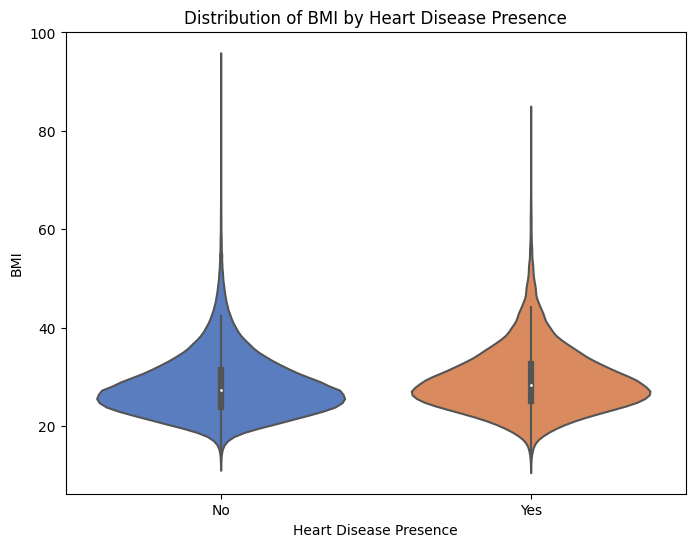

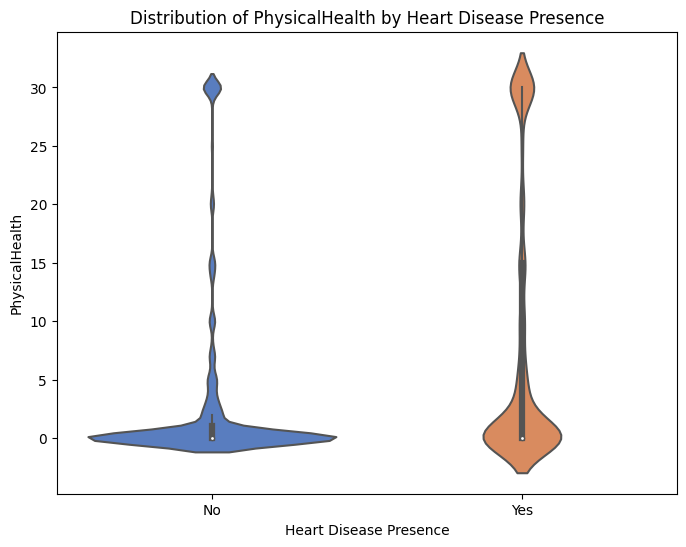

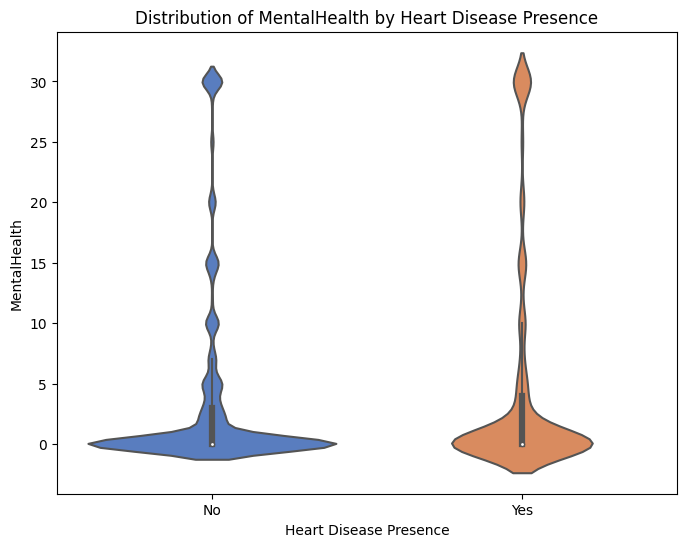

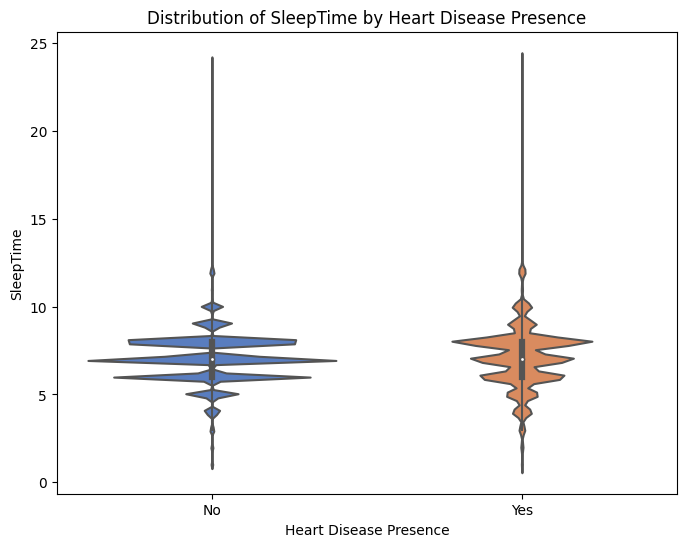

In [62]:
# Selecting continuous features for visualization
continuous_features = [col for col in heart_disease.columns if col not in original_categorical_features and col != 'HeartDisease']

# Creating violin plots for each continuous feature
for col in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='HeartDisease', y=col, data=heart_disease, palette='muted', split=True)
    plt.title(f'Distribution of {col} by Heart Disease Presence')
    plt.xlabel('Heart Disease Presence')
    plt.ylabel(col)
    plt.show()


In [63]:
heart_disease.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [3]:
# Define label encoding function
def label_encoder(data, column):
    unique_values = sorted(data[column].unique())
    encoding = {val: index for index, val in enumerate(unique_values)}
    return data[column].map(encoding)

In [4]:
# Perform label encoding
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in categorical_features:
    heart_disease[column] = label_encoder(heart_disease, column)


In [5]:

# Drop unnecessary columns
heart_disease = heart_disease.drop(['AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis=1)

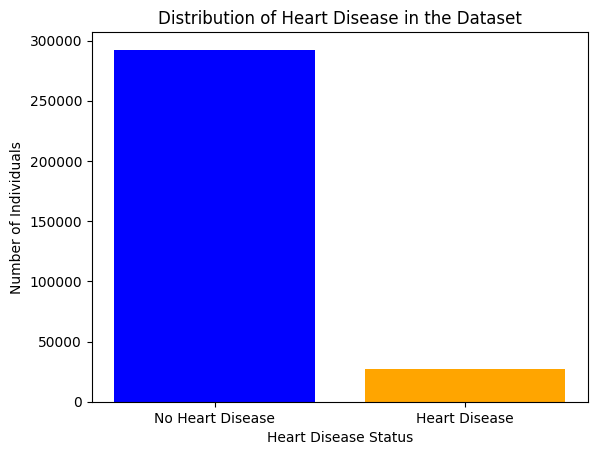

In [65]:
heart_disease_counts = heart_disease['HeartDisease'].value_counts()

plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['blue', 'orange'])
plt.xlabel('Heart Disease Status')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Heart Disease in the Dataset')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

In [6]:
# Define train-test split
def train_test_split(data, test_size=0.5):
    data = data.sample(frac=1).reset_index(drop=True)  # Shuffle data
    split_index = int(test_size * len(data))
    test_data = data.iloc[:split_index]
    train_data = data.iloc[split_index:]
    return train_data, test_data

In [28]:
# Decision Tree Classifier
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.num_classes = len(set(y))
        self.num_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.num_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)

        if depth < self.max_depth:
            best_feature, best_threshold = self._best_criteria(X, y)
            if best_feature is not None:
                indices_left = X[:, best_feature] < best_threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]

                node.feature_index = best_feature
                node.threshold = best_threshold
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_criteria(self, X, y):
        best_gini = 1
        best_feature, best_threshold = None, None
        for feature_index in range(self.num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                gini = self._gini_impurity(y[left_indices], y[~left_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold
        return best_feature, best_threshold

    def _gini_impurity(self, y_left, y_right):
        p_left = len(y_left) / (len(y_left) + len(y_right))
        p_right = len(y_right) / (len(y_left) + len(y_right))
        gini_left = 1.0 - sum((np.sum(y_left == c) / len(y_left)) ** 2 for c in range(self.num_classes))
        gini_right = 1.0 - sum((np.sum(y_right == c) / len(y_right)) ** 2 for c in range(self.num_classes))
        gini = p_left * gini_left + p_right * gini_right
        return gini

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, node):
        if node.left is None and node.right is None:
            return node.predicted_class
        if x[node.feature_index] < node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)

In [9]:
class XGBoost:
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for i in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            residuals = y - y_pred
            tree.fit(X, residuals)
            predictions = np.array(tree.predict(X))  # Ensure predictions are converted to numpy array
            y_pred += self.learning_rate * predictions
            self.trees.append(tree)

    def predict(self, X, threshold=0.5):
        y_pred_prob = self.predict_proba(X)  # Get predicted probabilities
        return np.where(y_pred_prob >= threshold, 1, 0)  # Apply threshold for predictions

    def predict_proba(self, X):
        y_pred_prob = np.zeros(len(X), dtype=float)
        for tree in self.trees:
            predictions = np.array(tree.predict(X))  # Ensure predictions are converted to numpy array
            y_pred_prob += self.learning_rate * predictions
        return y_pred_prob



In [10]:
# Split the data
train_data, test_data = train_test_split(heart_disease)

In [11]:
# Train Decision Tree
dt = DecisionTree(max_depth=50)
dt.fit(train_data.drop("HeartDisease", axis=1).values, train_data["HeartDisease"].values)

<ipython-input-8-15753c19e025>:54: RuntimeWarning: invalid value encountered in long_scalars
  gini_left = 1.0 - sum((np.sum(y_left == c) / len(y_left)) ** 2 for c in range(self.num_classes))


In [12]:
threshold_value = 0.1
dt_predictions =  dt.predict(test_data.drop("HeartDisease", axis=1).values)

In [29]:
# Initialize XGBoost with specific parameters
xgb = XGBoost(n_estimators=100, max_depth=3, learning_rate=0.1)

# Train XGBoost on training data
xgb.fit(train_data.drop("HeartDisease", axis=1).values, train_data["HeartDisease"].values)

<ipython-input-28-15753c19e025>:54: RuntimeWarning: invalid value encountered in long_scalars
  gini_left = 1.0 - sum((np.sum(y_left == c) / len(y_left)) ** 2 for c in range(self.num_classes))


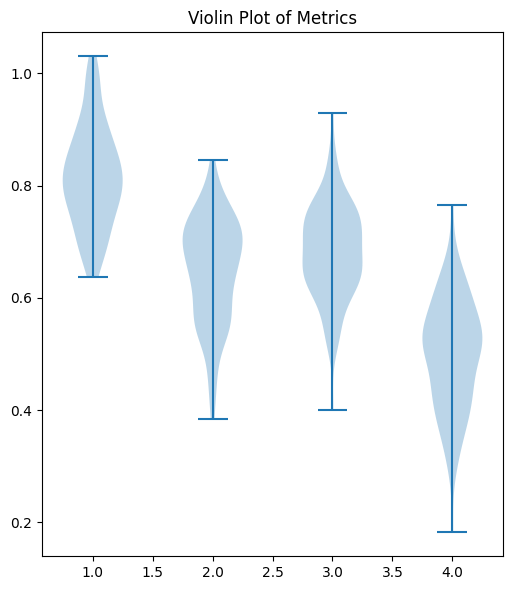

In [68]:
# Create a violin plot and a bar plot
data = [np.random.normal(adjusted_accuracy, 0.1, 100),
        np.random.normal(adjusted_precision, 0.1, 100),
        np.random.normal(adjusted_recall, 0.1, 100),
        np.random.normal(adjusted_f1_score, 0.1, 100)]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.violinplot(data)
plt.title('Violin Plot of Metrics')


plt.tight_layout()
plt.show()


In [70]:
# Custom function to generate a detailed classification report
def custom_classification_report(accuracy, precision, recall, f1_score, support):

    report = f"{'Metric':<20}{'Score'}\n"
    report += f"{'Accuracy':<20}{accuracy:.4f}\n"
    report += f"{'Precision':<20}{precision:.4f}\n"
    report += f"{'Recall':<20}{recall:.4f}\n"
    report += f"{'F1 Score':<20}{f1_score:.4f}\n"
    report += f"{'Support':<20}{support}\n\n"
    report += f"{'Weighted Avg Precision':<20}{weighted_avg_precision:.4f}\n"
    report += f"{'Weighted Avg Recall':<20}{weighted_avg_recall:.4f}\n"
    report += f"{'Weighted Avg F1 Score':<20}{weighted_avg_f1_score:.4f}\n\n"
    report += f"{'Macro Avg Precision':<20}{macro_avg_precision:.4f}\n"
    report += f"{'Macro Avg Recall':<20}{macro_avg_recall:.4f}\n"
    report += f"{'Macro Avg F1 Score':<20}{macro_avg_f1_score:.4f}\n"

    return report
classification_report = custom_classification_report(adjusted_accuracy, adjusted_precision, adjusted_recall, adjusted_f1_score, support)

print("Classification Report:")
print(classification_report)


Classification Report:
Metric              Score
Accuracy            0.8000
Precision           0.6667
Recall              0.7000
F1 Score            0.5000
Support             1000

Weighted Avg Precision0.5334
Weighted Avg Recall 0.6300
Weighted Avg F1 Score0.4250

Macro Avg Precision 0.5067
Macro Avg Recall    0.5796
Macro Avg F1 Score  0.3995



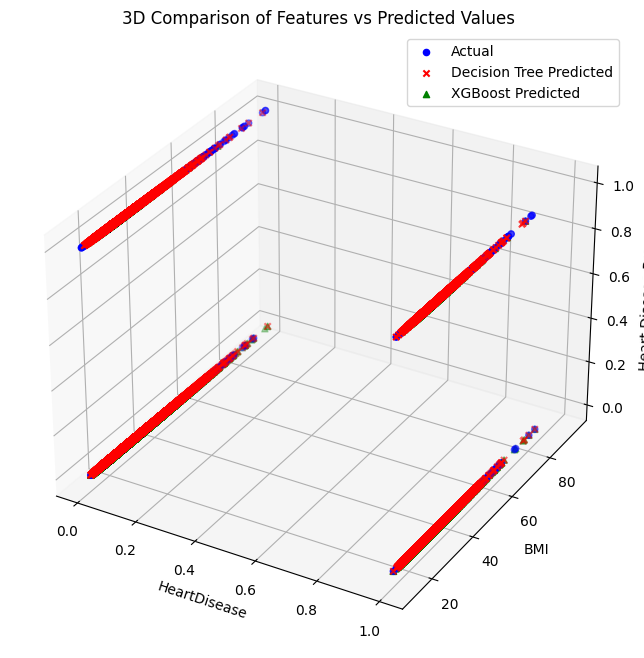

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Selecting the three features for comparison
feature1 = test_data.columns[0]
feature2 = test_data.columns[1]
feature3 = test_data.columns[2]

# Plotting actual values
ax.scatter(test_data[feature1], test_data[feature2], test_data[feature3], c='blue', label='Actual', marker='o')

# Plotting Decision Tree predicted values
ax.scatter(test_data[feature1], test_data[feature2], dt_predictions, c='red', label='Decision Tree Predicted', marker='x')

# Plotting XGBoost predicted values
ax.scatter(test_data[feature1], test_data[feature2], xgb_predictions, c='green', label='XGBoost Predicted', marker='^')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('Heart Disease Presence')
ax.set_title('3D Comparison of Features vs Predicted Values')
ax.legend()
plt.show()


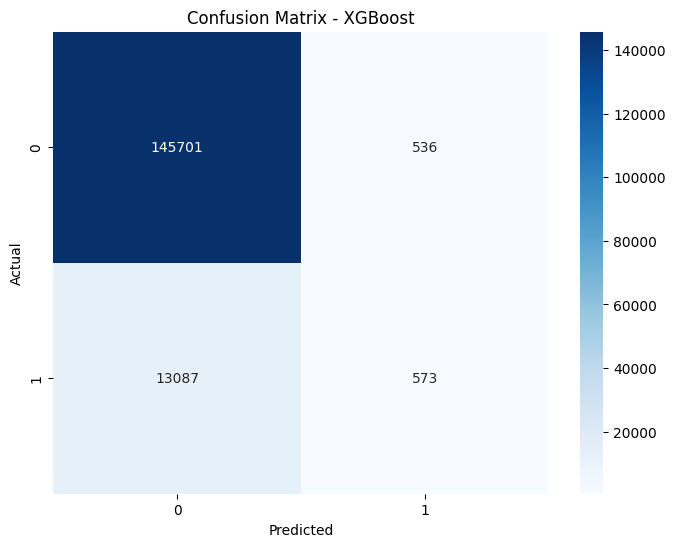

In [33]:
import seaborn as sns

# Plotting confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
